In [1]:
# Author: Ch.Laßmann <CsharpLassi>
# Version: 0.1 03.12.2020

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams["figure.figsize"] = (13, 5)


In [3]:
u_eff = 1
i_eff = 0.9
f = 50
per = 2

In [9]:
def plot_func(phi=0, save_fname:str=None):
    omega = 2* np.pi* f
    t = np.linspace(-per/(2*f),per/(2*f), num =100)
    phi_rad = phi/180*np.pi
    phi_3_rad = 0
    
    z = u_eff / i_eff
    r = z * np.cos(phi_rad)
    x = np.abs(z*np.sin(phi_rad))
    
    
    u = np.sqrt(2) * u_eff * np.cos(2*np.pi*f*t)
    i = np.sqrt(2) * i_eff * np.cos(2*np.pi*f*t - phi_rad)
    p = u * i
    
    p_line_value = np.max(p)+np.min(p)
    p_line =np.minimum(p, np.ones(len(p))*p_line_value)
    
    p_min = 3* u_eff * i_eff * np.cos(np.pi *3/4)
    p_max = 3* u_eff * i_eff
    
    plt.subplot(2, 1, 1)
    plt.xlim(t[0],t[-1])
    plt.plot(t,u,label="Spannung")
    plt.plot(t,i,label="Strom",)
    # plt.plot(t,p)
    plt.legend(loc=1)
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.xlim(t[0],t[-1])
    plt.ylim((p_min,p_max))
    plt.plot(t,p)
    plt.grid(True)
    
    
    plt.fill_between(t, p_line,
                 where=(p_line >= 0),
                 alpha=0.80, color='green', interpolate=True, label='Wirkarbeit')

    plt.fill_between(t, p, p_line,
                 where=(p >= p_line_value),
                 alpha=0.80, color='yellow', interpolate=True, label='Blindarbeit')

    plt.fill_between(t, p_line,
                 where=(p_line < 0),
                 alpha=0.80, color='red', interpolate=True, label='Blindarbeit')
    
    
    plt.legend(loc=1)
    
    #plt.axhline(p_r,color = 'green')
    #plt.axhline(p_q,color = 'red')
    
    if save_fname:
        plt.savefig(save_fname)
    
    plt.tight_layout()
    plt.show()
    
def update(phi = 0):
    plot_func(phi)
    
interact(update, 
         phi = widgets.FloatSlider(value=0, min=-90, max=90, step=1))

interactive(children=(FloatSlider(value=0.0, description='phi', max=90.0, min=-90.0, step=1.0), Output()), _do…

<function __main__.update(phi=0)>

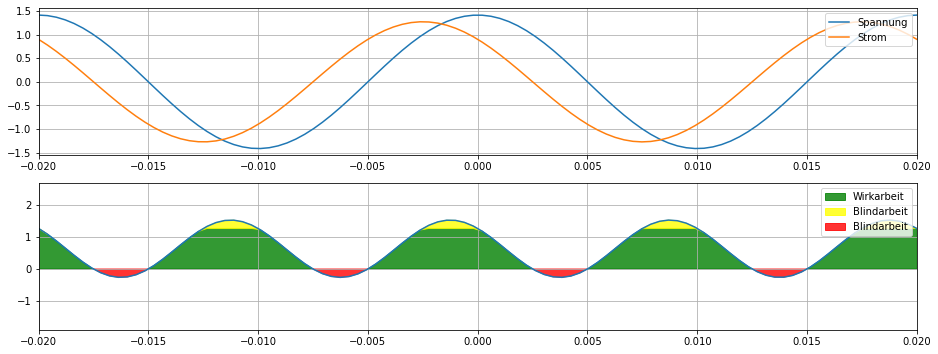

In [10]:
plot_func(phi=-45,save_fname='blindleistung_kondensator.png')